In [2]:
import pandas as pd
import duckdb as db
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

In [3]:
con = db.connect("../../ingestao_de_dados/database/db_distribuicao_profissoes.db")

In [4]:
con.execute("SHOW TABLES").df()

,name
0,tbl_advogados_brasil_2024
1,tbl_contadores_brasil_2024
2,tbl_engenheiros_brasil_2024
3,tbl_estados_brasil
4,tbl_psicologos_brasil_2024


In [5]:
tabelas = {
    "advogados": "tbl_advogados_brasil_2024",
    "contadores": "tbl_contadores_brasil_2024",
    "engenheiros": "tbl_engenheiros_brasil_2024",
    "psicologos": "tbl_psicologos_brasil_2024",
    "estados": "tbl_estados_brasil"
}

tabela = {nome: con.execute(f"SELECT * FROM {tabela}").df() for nome, tabela in tabelas.items()}

In [86]:
tabela['advogados'].head()

,estado,feminino,masculino
0,AC,1898,2078
1,AL,7376,7847
2,AM,8181,7544
3,AP,2124,2049
4,BA,33281,28654


In [85]:
tabela['contadores'].head()

,estado,feminino,masculino
0,DF,6407,4512
1,GO,6276,4137
2,MS,2886,2637
3,MT,4241,4037
4,AL,1832,1433


In [84]:
tabela['engenheiros'].head()

,estado,feminino,masculino
0,CREA-AC,710,1892
1,CREA-AL,1677,7159
2,CREA-AM,4236,11833
3,CREA-AP,391,1278
4,CREA-BA,12202,39436


In [83]:
tabela['psicologos'].head()

,estado,feminino,masculino
0,Acre,1181,236
1,Alagoas,5399,991
2,Amapá,1201,261
3,Amazonas,5163,996
4,Bahia,21113,3559


In [82]:
tabela['estados'].head()

,id,uf,nome_estado
0,1,AC,Acre
1,2,AL,Alagoas
2,4,AM,Amazonas
3,5,AP,Amapá
4,6,BA,Bahia


In [11]:
con.execute("DESCRIBE tbl_advogados_brasil_2024").df()
con.execute("DESCRIBE tbl_contadores_brasil_2024").df()
con.execute("DESCRIBE tbl_engenheiros_brasil_2024").df()
con.execute("DESCRIBE tbl_psicologos_brasil_2024").df()

,column_name,column_type,null,key,default,extra
0,estado,VARCHAR,NO,PRI,None,None
1,feminino,INTEGER,YES,None,None,None
2,masculino,INTEGER,YES,None,None,None


In [12]:
query = """
    SELECT *, 'advogado' AS profissao
    FROM tbl_advogados_brasil_2024

    UNION ALL

    SELECT *, 'contador' AS profissao
    FROM tbl_contadores_brasil_2024

    UNION ALL

    SELECT *, 'engenheiro' AS profissao
    FROM tbl_engenheiros_brasil_2024

    UNION ALL

    SELECT *, 'psicologo' AS profissao
    FROM tbl_psicologos_brasil_2024
"""

In [13]:
df_profissoes = con.execute(query).df()
df_profissoes

,estado,feminino,masculino,profissao
0,AC,1898,2078,advogado
1,AL,7376,7847,advogado
2,AM,8181,7544,advogado
3,AP,2124,2049,advogado
4,BA,33281,28654,advogado
...,...,...,...,...
103,Roraima,971,167,psicologo
104,Santa Catarina,17963,2739,psicologo
105,São Paulo,132077,22613,psicologo
106,Sergipe,3372,723,psicologo


In [14]:
df_profissoes[df_profissoes['profissao'] == 'advogado'].describe()

,feminino,masculino
count,27.000000,27.000000
mean,27508.518519,25522.851852
std,39997.618600,36525.059606
min,1473.000000,1398.000000
25%,7741.000000,7695.500000
50%,13516.000000,12059.000000
75%,27792.500000,25293.500000
max,197236.000000,181116.000000


In [15]:
df_profissoes[df_profissoes['profissao'] == 'contador'].describe()

,feminino,masculino
count,27.000000,27.000000
mean,7631.000000,6777.518519
std,11128.348709,9851.721413
min,501.000000,512.000000
25%,2207.000000,1976.000000
50%,4174.000000,4037.000000
75%,7952.000000,6521.000000
max,56528.000000,49302.000000


In [16]:
df_profissoes[df_profissoes['profissao'] == 'engenheiro'].describe()

,feminino,masculino
count,27.000000,27.000000
mean,8695.222222,34465.666667
std,11525.265271,56973.482517
min,391.000000,1119.000000
25%,2029.000000,7572.000000
50%,4602.000000,17778.000000
75%,10007.500000,33231.500000
max,53124.000000,281812.000000


In [17]:
df_profissoes[df_profissoes['profissao'] == 'psicologo'].describe()

,feminino,masculino
count,27.000000,27.000000
mean,16698.592593,2884.222222
std,26513.606301,4540.061041
min,971.000000,167.000000
25%,4584.000000,756.000000
50%,6371.000000,1206.000000
75%,17526.500000,2834.500000
max,132077.000000,22613.000000


In [19]:
df_estados_profissoes = con.execute("""
    SELECT
        a.id,
        a.nome_estado,
        b.M_advogados,
        b.F_advogados,
        c.M_contadores,
        c.F_contadores,
        d.M_engenheiros,
        d.F_engenheiros,
        e.M_psicologos,
        e.F_psicologos
    
    FROM tbl_estados_brasil AS a 
    
    LEFT JOIN(
        SELECT 
            UPPER(estado) AS estado,
            masculino AS M_advogados,
            feminino AS F_advogados
        FROM tbl_advogados_brasil_2024        
    ) AS b ON UPPER(a.uf) = b.estado

    LEFT JOIN(
        SELECT 
            UPPER(estado) AS estado,
            masculino AS M_contadores,
            feminino AS F_contadores
        FROM tbl_contadores_brasil_2024
    ) AS c ON UPPER(a.uf) = c.estado

    LEFT JOIN(
        SELECT 
            UPPER(REPLACE(estado, 'CREA-', '')) AS estado,
            masculino AS M_engenheiros,
            feminino AS F_engenheiros
        FROM tbl_engenheiros_brasil_2024
    ) AS d ON UPPER(a.uf) = d.estado

    LEFT JOIN(
        SELECT 
            UPPER(estado) AS estado,
            masculino AS M_psicologos,
            feminino AS F_psicologos
        FROM tbl_psicologos_brasil_2024
    ) AS e ON UPPER(a.nome_estado) = e.estado
""").df()

In [20]:
df_estados_profissoes

,id,nome_estado,M_advogados,F_advogados,M_contadores,F_contadores,M_engenheiros,F_engenheiros,M_psicologos,F_psicologos
0,1,Acre,2078,1898,512,539,1892,710,236,1181
1,2,Alagoas,7847,7376,1433,1832,7159,1677,991,5399
2,4,Amazonas,7544,8181,3106,2532,11833,4236,996,5163
3,5,Amapá,2049,2124,660,743,1278,391,261,1201
4,6,Bahia,28654,33281,7314,9497,39436,12202,3559,21113
5,7,Ceará,20292,19541,4375,5587,19166,4673,2508,12387
6,8,Distrito Federal,25358,26508,4512,6407,18081,4602,2407,13246
7,9,Espírito Santo,13009,14451,4174,4174,17778,6004,1499,7601
8,10,Goiás,25229,28562,4137,6276,28991,8487,1966,13638
9,11,Maranhão,12020,12026,2475,3425,12044,3821,1028,5475


In [23]:
top5_advogados = con.execute("""
    SELECT nome_estado, (M_advogados + F_advogados) AS total_advogados
    FROM df_estados_profissoes
    ORDER BY total_advogados DESC
    LIMIT 5
""").df()

top5_contadores = con.execute("""
    SELECT nome_estado, (M_contadores + F_contadores) AS total_contadores
    FROM df_estados_profissoes
    ORDER BY total_contadores DESC
    LIMIT 5
""").df()

top5_engenheiros = con.execute("""
    SELECT nome_estado, (M_engenheiros + F_engenheiros) AS total_engenheiros
    FROM df_estados_profissoes
    ORDER BY total_engenheiros DESC
    LIMIT 5
""").df()

top5_psicologos = con.execute("""
    SELECT nome_estado, (M_psicologos + F_psicologos) AS total_psicologos
    FROM df_estados_profissoes
    ORDER BY total_psicologos DESC
    LIMIT 5
""").df()

In [24]:
display(top5_advogados)
display(top5_contadores)
display(top5_engenheiros)
display(top5_psicologos)

,nome_estado,total_advogados
0,São Paulo,378352
1,Rio de Janeiro,159025
2,Minas Gerais,144147
3,Rio Grande do Sul,98688
4,Paraná,91891


,nome_estado,total_contadores
0,São Paulo,105830
1,Rio de Janeiro,38143
2,Minas Gerais,36471
3,Paraná,27960
4,Rio Grande do Sul,25996


,nome_estado,total_engenheiros
0,São Paulo,334936
1,Minas Gerais,154335
2,Rio de Janeiro,117187
3,Paraná,71868
4,Rio Grande do Sul,68162


,nome_estado,total_psicologos
0,São Paulo,154690
1,Rio de Janeiro,59158
2,Minas Gerais,57498
3,Paraná,31757
4,Rio Grande do Sul,31681


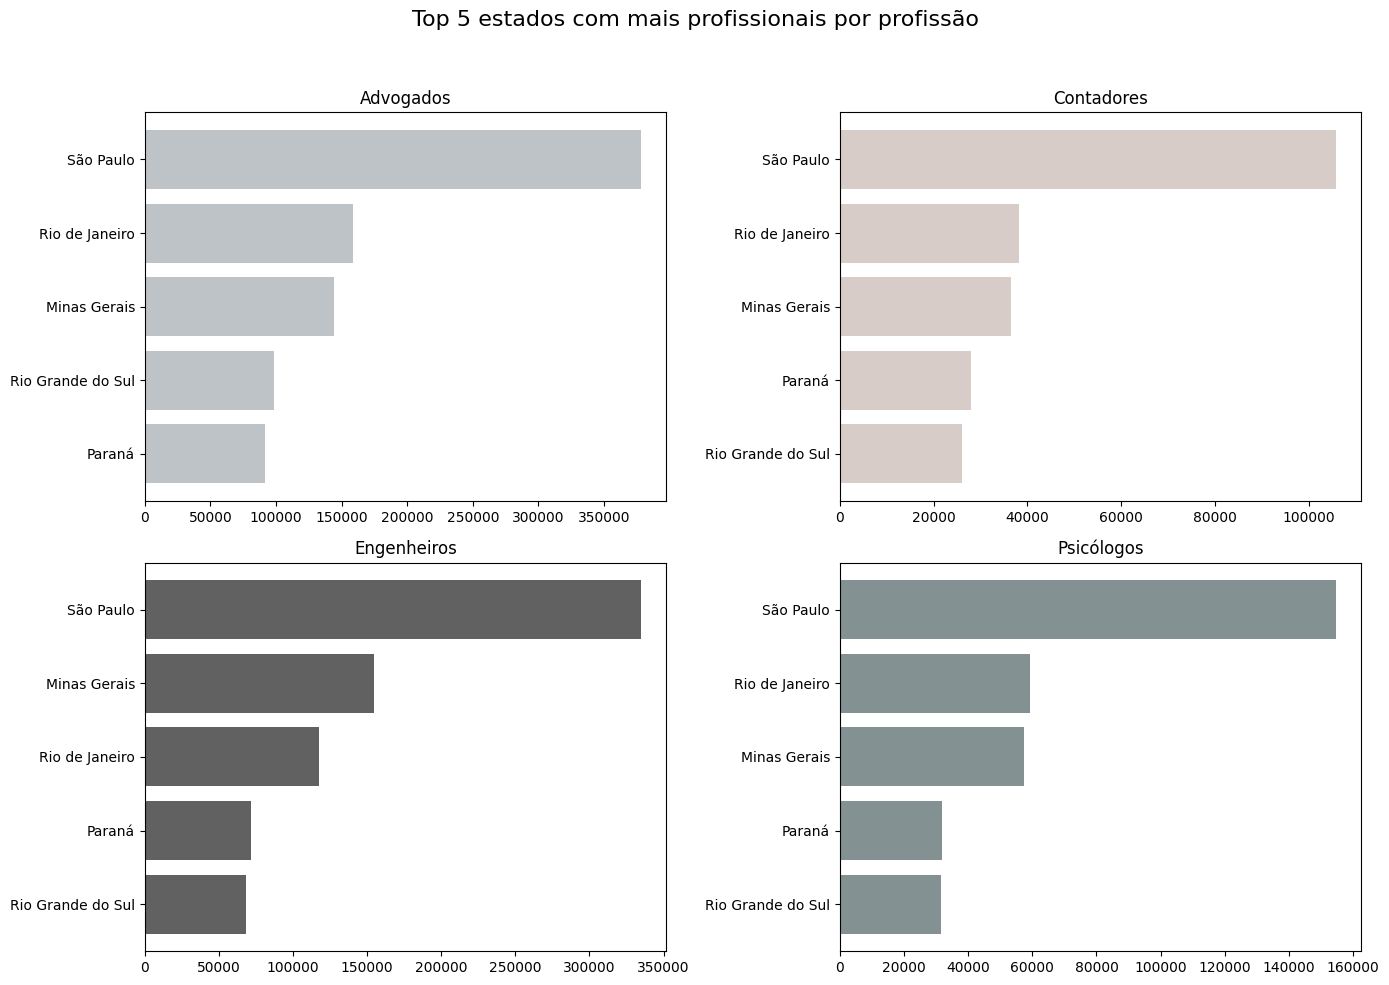

In [25]:
# Soma homens e mulheres de cada profissão
# Cria os subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Top 5 estados com mais profissionais por profissão', fontsize=16)

# Gráfico 1: Advogados
axs[0, 0].barh(top5_advogados['nome_estado'], top5_advogados['total_advogados'], color='#bdc3c7')
axs[0, 0].set_title('Advogados')
axs[0, 0].invert_yaxis()

# Gráfico 2: Contadores
axs[0, 1].barh(top5_contadores['nome_estado'], top5_contadores['total_contadores'], color='#d7ccc8')
axs[0, 1].set_title('Contadores')
axs[0, 1].invert_yaxis()

# Gráfico 3: Engenheiros
axs[1, 0].barh(top5_engenheiros['nome_estado'], top5_engenheiros['total_engenheiros'], color='#616161')
axs[1, 0].set_title('Engenheiros')
axs[1, 0].invert_yaxis()

# Gráfico 4: Psicólogos
axs[1, 1].barh(top5_psicologos['nome_estado'], top5_psicologos['total_psicologos'], color='#839192')
axs[1, 1].set_title('Psicólogos')
axs[1, 1].invert_yaxis()

# Ajusta layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [29]:
top5_masculino = con.execute("""
    SELECT 
        nome_estado,
        SUM(M_advogados) AS advogados,
        SUM(M_contadores) AS contadores,
        SUM(M_engenheiros) AS engenheiros,
        SUM(M_psicologos) AS psicologos,
        SUM(M_advogados + M_contadores + M_engenheiros + M_psicologos) AS total_masculino
    FROM df_estados_profissoes
    GROUP BY nome_estado
    ORDER BY total_masculino DESC
    LIMIT 5
""").df()

In [30]:
top5_masculino

,nome_estado,advogados,contadores,engenheiros,psicologos,total_masculino
0,São Paulo,181116.0,49302.0,281812.0,22613.0,534843.0
1,Minas Gerais,69942.0,18568.0,121679.0,9033.0,219222.0
2,Rio de Janeiro,74423.0,17855.0,93569.0,8476.0,194323.0
3,Paraná,44869.0,12027.0,58273.0,4695.0,119864.0
4,Rio Grande do Sul,47028.0,13618.0,54101.0,4001.0,118748.0


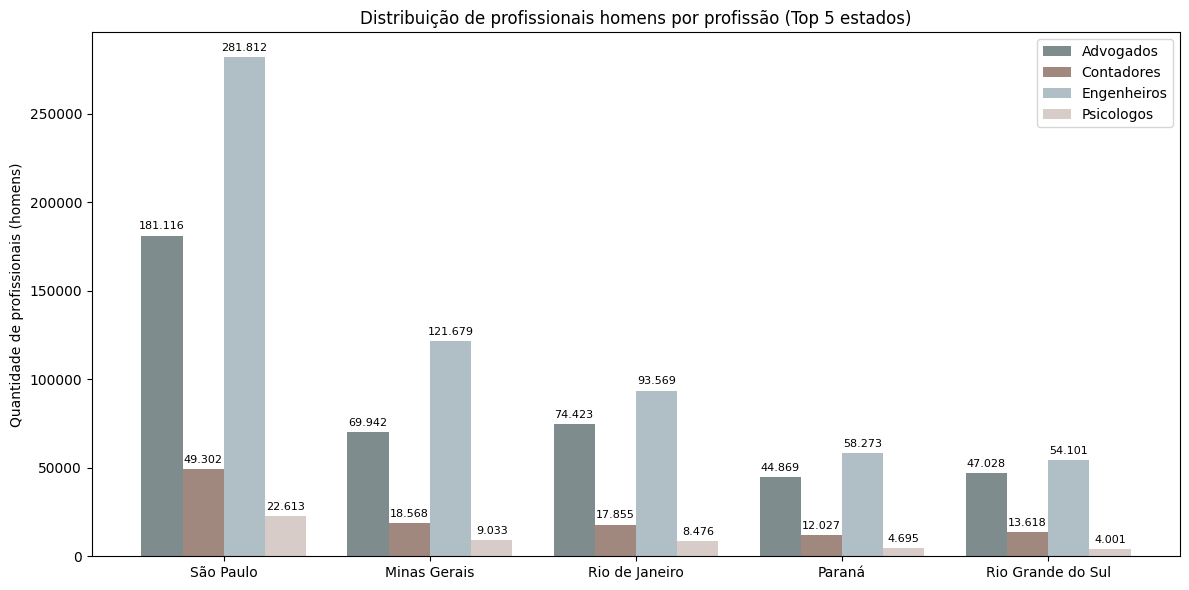

In [50]:
estados = top5_masculino['nome_estado'].tolist()
profissoes = ['advogados', 'contadores', 'engenheiros', 'psicologos']
valores = [top5_masculino[prof].values for prof in profissoes]

# Configuração
x = np.arange(len(estados))
width = 0.2
fig, ax = plt.subplots(figsize=(12, 6))
cores = ['#7f8c8d', '#a1887f', '#b0bec5', '#d7ccc8']

# Plota barras com anotações de valor
for i, (prof, cor) in enumerate(zip(profissoes, cores)):
    bars = ax.bar(x + i * width, valores[i], width, label=prof.capitalize(), color=cor)
    # Adiciona o valor acima de cada barra
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}'.replace(',', '.'),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # desloca um pouco pra cima
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Ajustes visuais
ax.set_ylabel('Quantidade de profissionais (homens)')
ax.set_title('Distribuição de profissionais homens por profissão (Top 5 estados)')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(estados)
ax.legend()
plt.tight_layout()
plt.show()

In [70]:
top5_feminino = con.execute("""
    SELECT 
        nome_estado,
        SUM(F_advogados) AS advogadas,
        SUM(F_contadores) AS contadoras,
        SUM(F_engenheiros) AS engenheiras,
        SUM(F_psicologos) AS psicologas,
        SUM(F_advogados + F_contadores + F_engenheiros + F_psicologos) AS total_feminino
    FROM df_estados_profissoes
    GROUP BY nome_estado
    ORDER BY total_feminino DESC
    LIMIT 5
""").df()

In [71]:
top5_feminino

,nome_estado,advogadas,contadoras,engenheiras,psicologas,total_feminino
0,São Paulo,197236.0,56528.0,53124.0,132077.0,438965.0
1,Rio de Janeiro,84602.0,20288.0,23618.0,50682.0,179190.0
2,Minas Gerais,74205.0,17903.0,32656.0,48465.0,173229.0
3,Rio Grande do Sul,51660.0,12378.0,14061.0,27680.0,105779.0
4,Paraná,47022.0,15933.0,13595.0,27062.0,103612.0


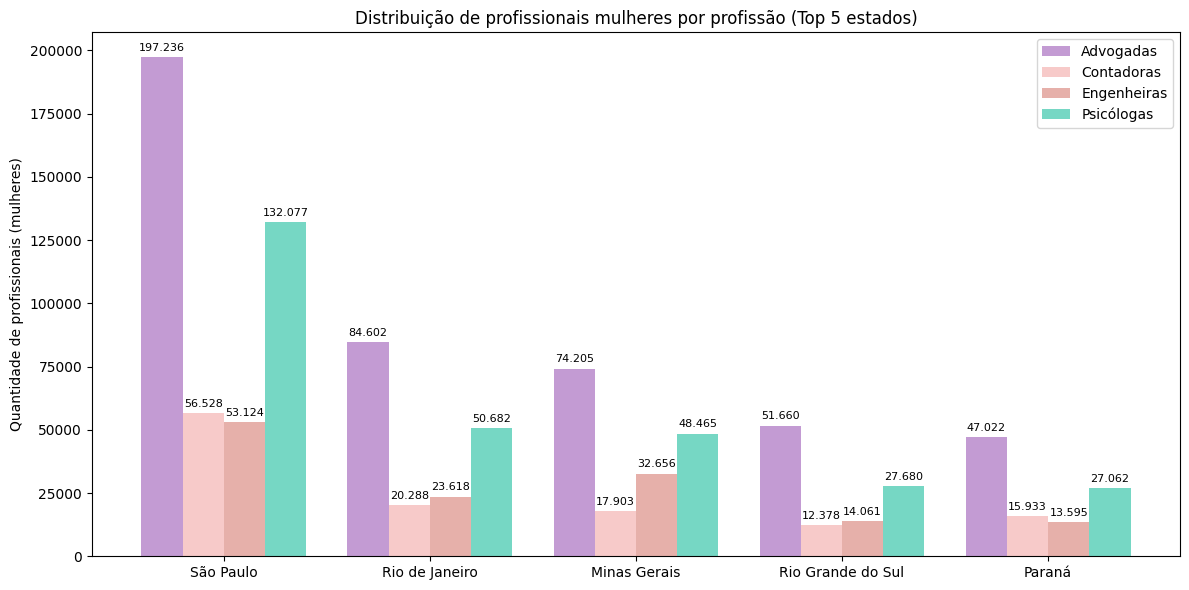

In [76]:
estados = top5_feminino['nome_estado'].tolist()
profissoes = ['advogadas', 'contadoras', 'engenheiras', 'psicologas']
labels = ['Advogadas', 'Contadoras', 'Engenheiras', 'Psicólogas']
valores = [top5_feminino[prof].values for prof in profissoes]
cores = ['#c39bd3', '#f7cac9', '#e6b0aa', '#76d7c4']

# Configuração do gráfico
x = np.arange(len(estados))
width = 0.2
fig, ax = plt.subplots(figsize=(12, 6))

# Plotagem com rótulos
for i, (label, cor) in enumerate(zip(labels, cores)):
    bars = ax.bar(x + i * width, valores[i], width, label=label, color=cor)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}'.replace(',', '.'),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Estilo
ax.set_ylabel('Quantidade de profissionais (mulheres)')
ax.set_title('Distribuição de profissionais mulheres por profissão (Top 5 estados)')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(estados)
ax.legend()
plt.tight_layout()
plt.show()

In [79]:
# Função para gerar gráfico horizontal com rótulos
def plot_top5_profissao(df, coluna_valor, titulo, cor):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(df['nome_estado'], df[coluna_valor], color=cor)
    ax.set_xlabel('Número de profissionais')
    ax.set_title(titulo)

    for i, v in enumerate(df[coluna_valor]):
        ax.text(v + max(df[coluna_valor])*0.01, i, str(v), va='center', fontsize=10)

    ax.invert_yaxis()  # Coloca o maior valor no topo
    plt.tight_layout()
    plt.show()

In [57]:
top5_m_advogados = con.execute("""
    SELECT nome_estado, M_advogados AS total
    FROM df_estados_profissoes
    ORDER BY total DESC
    LIMIT 5
""").df()

top5_m_contadores = con.execute("""
    SELECT nome_estado, M_contadores AS total
    FROM df_estados_profissoes
    ORDER BY total DESC
    LIMIT 5
""").df()

top5_m_engenheiros = con.execute("""
    SELECT nome_estado, M_engenheiros AS total
    FROM df_estados_profissoes
    ORDER BY total DESC
    LIMIT 5
""").df()

top5_m_psicologos = con.execute("""
    SELECT nome_estado, M_psicologos AS total
    FROM df_estados_profissoes
    ORDER BY total DESC
    LIMIT 5
""").df()

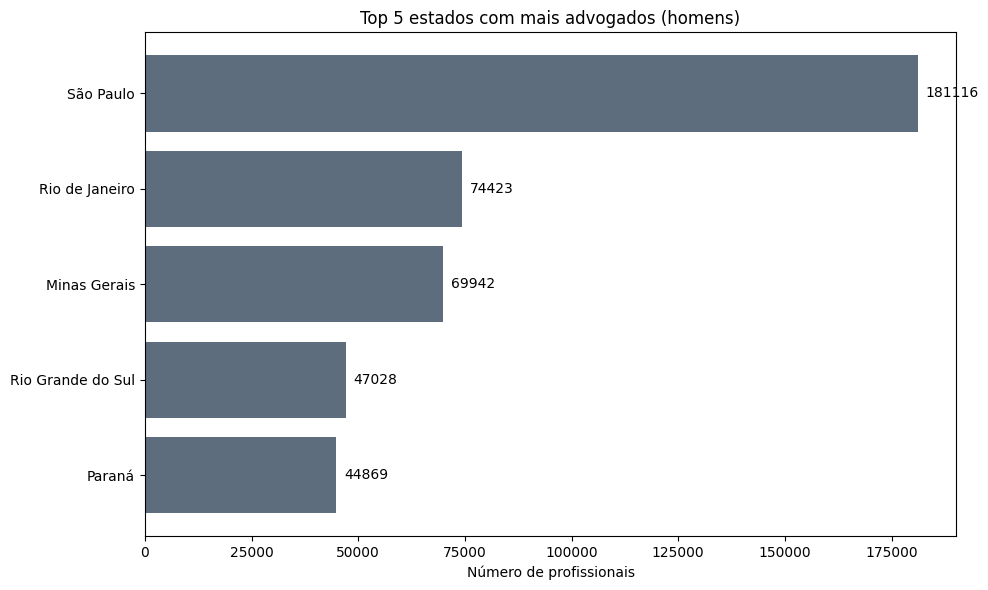

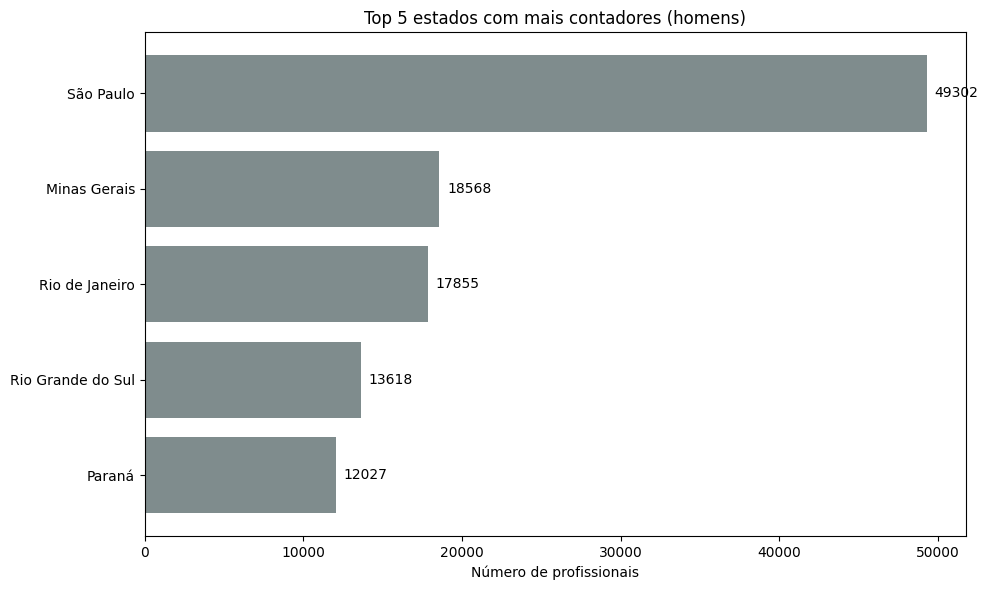

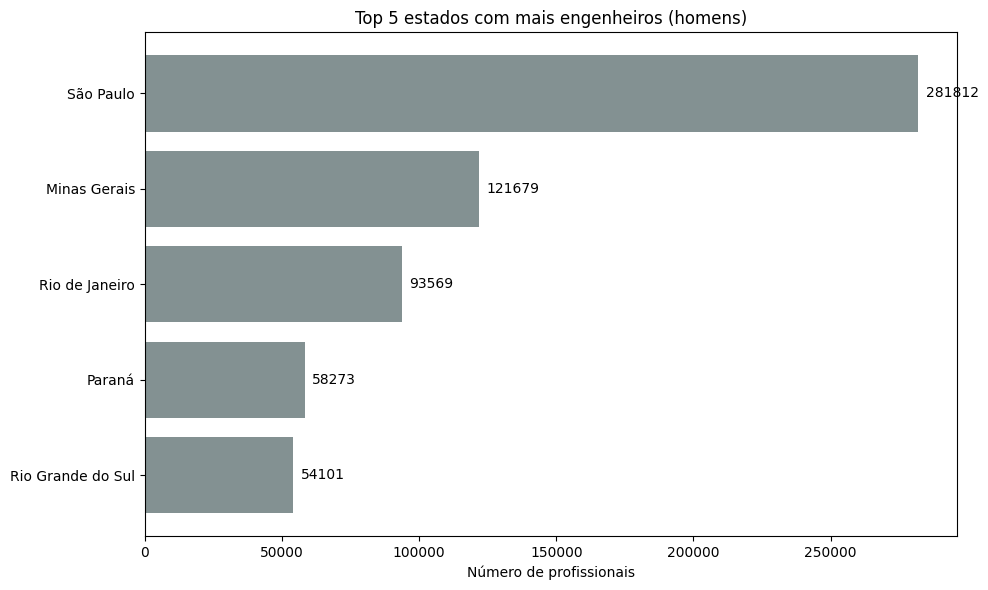

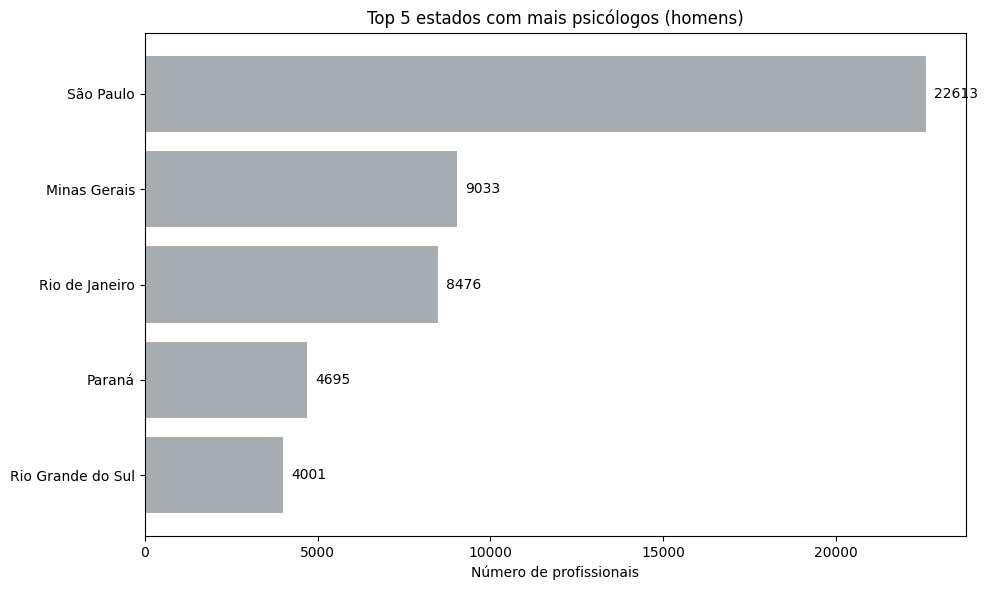

In [80]:
plot_top5_profissao(top5_m_advogados, 'total', 'Top 5 estados com mais advogados (homens)', '#5d6d7e')
plot_top5_profissao(top5_m_contadores, 'total', 'Top 5 estados com mais contadores (homens)', '#7f8c8d')
plot_top5_profissao(top5_m_engenheiros, 'total', 'Top 5 estados com mais engenheiros (homens)', '#839192')
plot_top5_profissao(top5_m_psicologos, 'total', 'Top 5 estados com mais psicólogos (homens)', '#a6acaf')

In [60]:
top5_f_advogados = con.execute("""
    SELECT nome_estado, F_advogados AS total
    FROM df_estados_profissoes
    ORDER BY total DESC
    LIMIT 5
""").df()

top5_f_contadores = con.execute("""
    SELECT nome_estado, F_contadores AS total
    FROM df_estados_profissoes
    ORDER BY total DESC
    LIMIT 5
""").df()

top5_f_engenheiros = con.execute("""
    SELECT nome_estado, F_engenheiros AS total
    FROM df_estados_profissoes
    ORDER BY total DESC
    LIMIT 5
""").df()

top5_f_psicologos = con.execute("""
    SELECT nome_estado, F_psicologos AS total
    FROM df_estados_profissoes
    ORDER BY total DESC
    LIMIT 5
""").df()

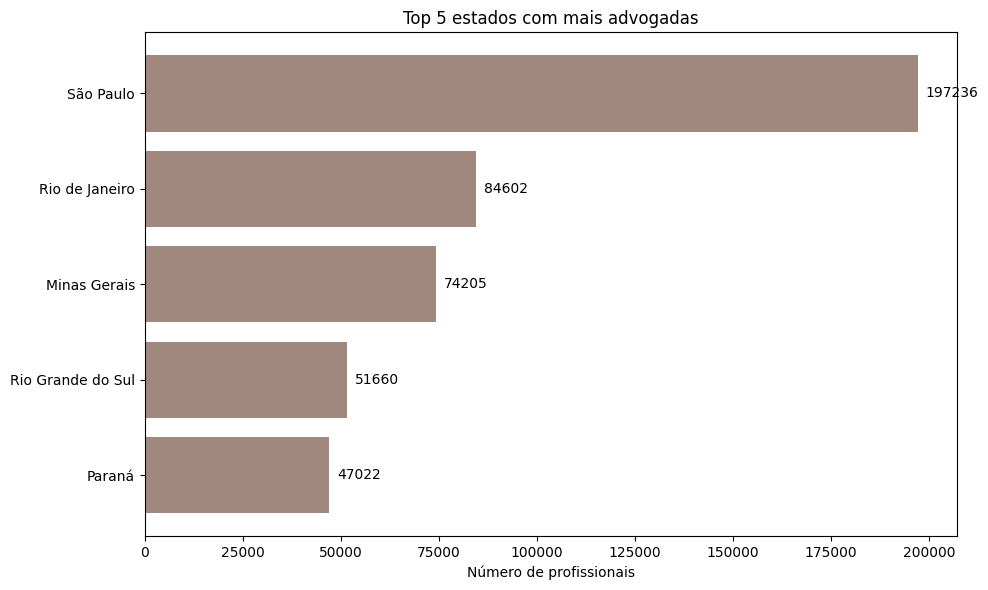

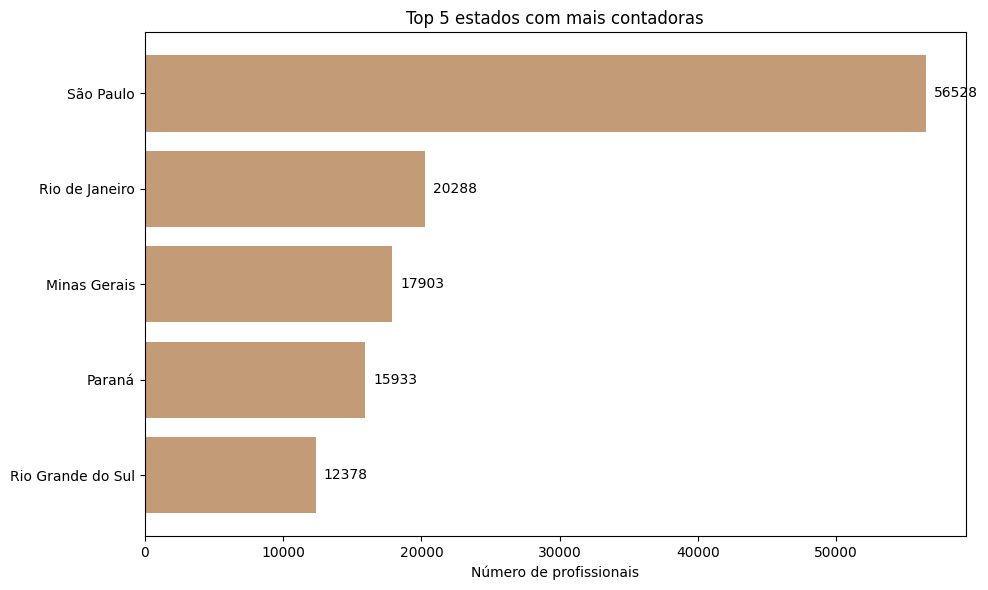

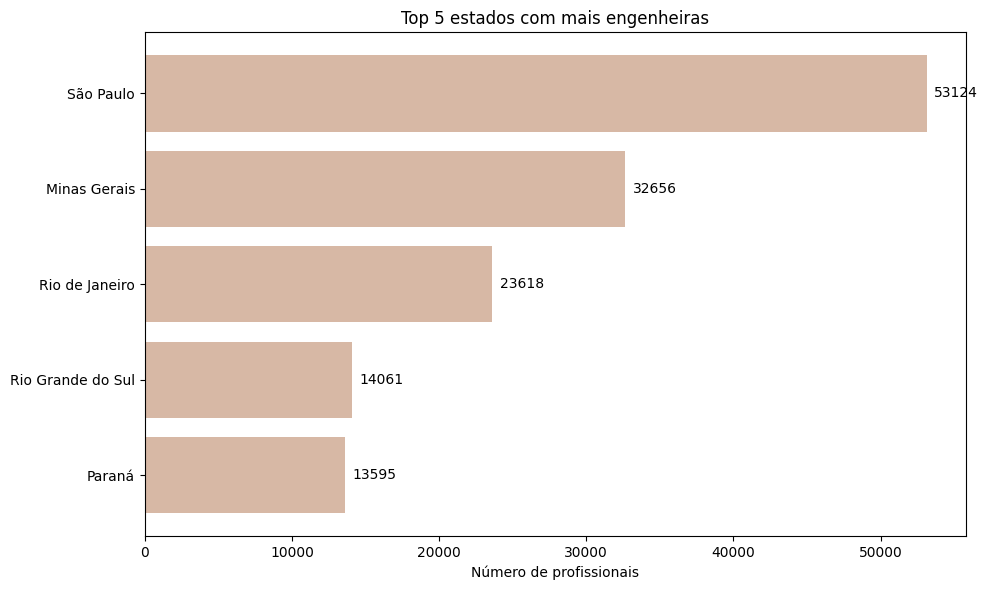

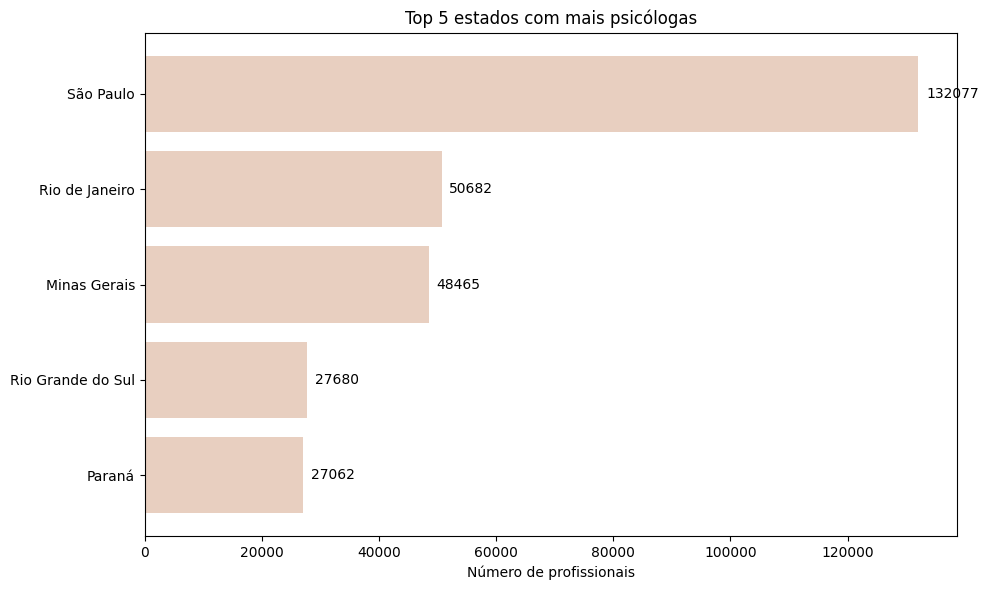

In [81]:
plot_top5_profissao(top5_f_advogados, 'total', 'Top 5 estados com mais advogadas', '#a1887f')
plot_top5_profissao(top5_f_contadores, 'total', 'Top 5 estados com mais contadoras', '#c39b77')
plot_top5_profissao(top5_f_engenheiros, 'total', 'Top 5 estados com mais engenheiras', '#d7b8a5')
plot_top5_profissao(top5_f_psicologos, 'total', 'Top 5 estados com mais psicólogas', '#e8cfc0')